In [2]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch
import numpy as np
import pandas as pd
import sklearn.metrics as metric
from sklearn import preprocessing
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
welding_data = pd.read_csv('Data_RSW.csv', index_col='Sample ID')
welding_data.head()

,Pressure (PSI),Welding Time (ms),Angle (Deg),Force (N),Current (A),Thickness A (mm),Thickness B (mm),Material,PullTest (N),NuggetDiameter (mm),Category,Comments
Sample ID,,,,,,,,,,,,
1,35,200,0,0.00,1315.41,0.922,0.920,SS,2127.7,2.63,Bad,DOE
1,35,200,0,3.41,1337.45,0.922,0.920,SS,2127.7,2.63,Bad,DOE
1,35,200,0,6.82,1081.47,0.922,0.920,SS,2127.7,2.63,Bad,DOE
2,35,1500,0,0.00,1819.13,0.920,0.925,SS,5346.4,3.34,Good,DOE
2,35,1500,0,3.41,2016.44,0.920,0.925,SS,5346.4,3.34,Good,DOE


In [5]:
for feature in welding_data:
    print(welding_data[feature].value_counts())

Pressure (PSI)
60    2797
80    1093
95     149
35     147
Name: count, dtype: int64
Welding Time (ms)
1000    1048
800      906
1200     751
600      685
400      500
1500     246
200       50
Name: count, dtype: int64
Angle (Deg)
15    2097
0     2089
Name: count, dtype: int64
Force (N)
0.00      16
95.00     15
115.93    13
98.26     12
95.64     11
          ..
113.92     1
113.66     1
113.41     1
113.13     1
97.90      1
Name: count, Length: 2000, dtype: int64
Current (A)
3206.55    8
3074.57    6
3490.11    5
3562.78    5
3088.52    5
          ..
2150.18    1
3258.70    1
1734.92    1
2573.97    1
3914.27    1
Name: count, Length: 2765, dtype: int64
Thickness A (mm)
0.625    244
0.632    229
0.631    209
0.623    166
0.638    166
        ... 
0.928      3
0.940      3
0.927      3
0.922      3
0.946      2
Name: count, Length: 69, dtype: int64
Thickness B (mm)
0.631    217
0.623    208
0.635    206
0.634    191
0.622    184
        ... 
0.922      3
0.915      3
0.935      3


In [10]:
welding_data[['Pressure (PSI)','Welding Time (ms)','Angle (Deg)','Force (N)','Current (A)','Thickness A (mm)','Thickness B (mm)','PullTest (N)','NuggetDiameter (mm)']].describe()

,Pressure (PSI),Welding Time (ms),Angle (Deg),Force (N),Current (A),Thickness A (mm),Thickness B (mm),PullTest (N),NuggetDiameter (mm)
count,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.00000,4186.000000
mean,65.590062,875.298614,7.514333,91.217286,3019.032711,2.289362,3.501072,3032.96204,3.577721
std,11.780475,303.025712,7.500882,19.300206,844.557376,31.916085,42.217941,521.44465,0.393631
min,35.000000,200.000000,0.000000,-99.000000,-99.000000,0.610000,0.608000,1410.30000,1.900000
25%,60.000000,600.000000,0.000000,78.890000,2663.300000,0.623000,0.623000,2783.60000,3.350000
50%,60.000000,800.000000,15.000000,95.010000,3155.460000,0.631000,0.630000,2994.10000,3.570000
75%,80.000000,1000.000000,15.000000,103.677500,3571.340000,0.638000,0.635000,3141.80000,3.757500
max,95.000000,1500.000000,15.000000,133.530000,5009.430000,624.000000,632.000000,5806.50000,4.720000


In [11]:
welding_data[['Pressure (PSI)','Welding Time (ms)','Angle (Deg)','Force (N)','Current (A)','Thickness A (mm)','Thickness B (mm)','PullTest (N)','NuggetDiameter (mm)']].corr(method='pearson')

,Pressure (PSI),Welding Time (ms),Angle (Deg),Force (N),Current (A),Thickness A (mm),Thickness B (mm),PullTest (N),NuggetDiameter (mm)
Pressure (PSI),1.000000,-0.079988,-0.444454,0.526777,-0.121048,0.062835,0.082659,-0.144020,-0.166265
Welding Time (ms),-0.079988,1.000000,-0.009779,-0.126018,-0.096344,0.022027,0.009871,0.568349,0.433629
Angle (Deg),-0.444454,-0.009779,1.000000,-0.348471,0.210617,-0.051503,-0.067701,0.187748,0.089211
Force (N),0.526777,-0.126018,-0.348471,1.000000,0.132544,0.039265,0.059970,-0.355472,-0.152311
Current (A),-0.121048,-0.096344,0.210617,0.132544,1.000000,-0.029310,-0.007450,-0.319442,0.011392
Thickness A (mm),0.062835,0.022027,-0.051503,0.039265,-0.029310,1.000000,-0.003526,-0.033187,-0.029469
Thickness B (mm),0.082659,0.009871,-0.067701,0.059970,-0.007450,-0.003526,1.000000,-0.015153,-0.060979
PullTest (N),-0.144020,0.568349,0.187748,-0.355472,-0.319442,-0.033187,-0.015153,1.000000,0.491057
NuggetDiameter (mm),-0.166265,0.433629,0.089211,-0.152311,0.011392,-0.029469,-0.060979,0.491057,1.000000


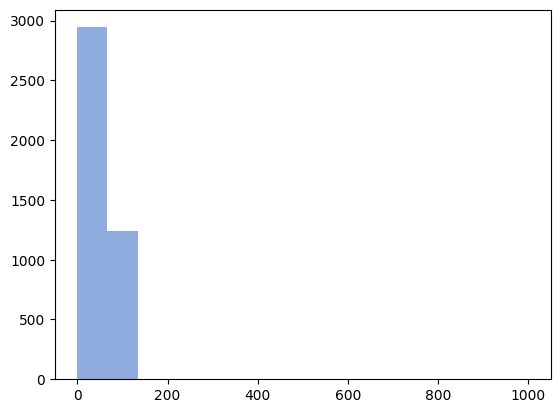

In [32]:
b = [15, 15, 25, 13, 17, 15, 35, 15, 15]
%matplotlib inline

Pressure = plt.hist(welding_data['Pressure (PSI)'], bins = b[0], facecolor = (144 /255,171 /255,221 /255), range=(0, 1000))

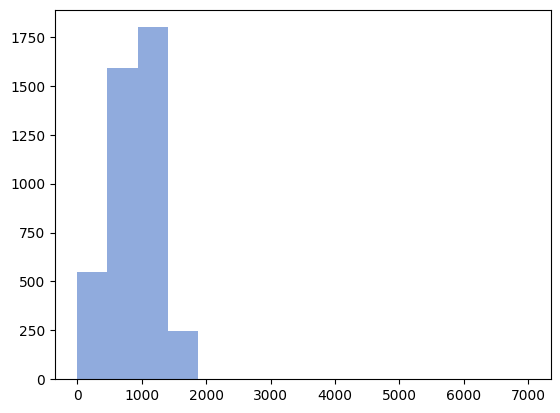

In [31]:
Welding_Time = plt.hist(welding_data['Welding Time (ms)'], bins = b[1], facecolor = (144 /255,171 /255,221 /255), range=(0, 7000))

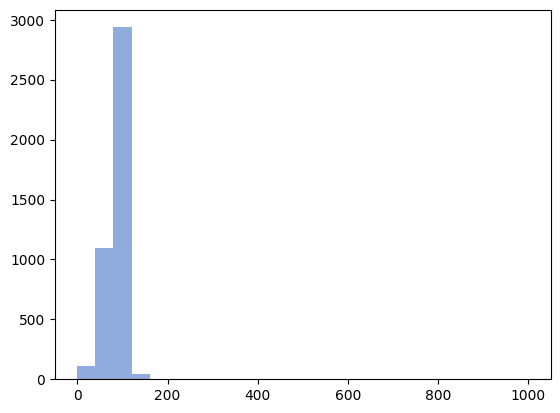

In [36]:
Force = plt.hist(welding_data['Force (N)'], bins = b[2], facecolor = (144 /255,171 /255,221 /255), range=(0, 1000))

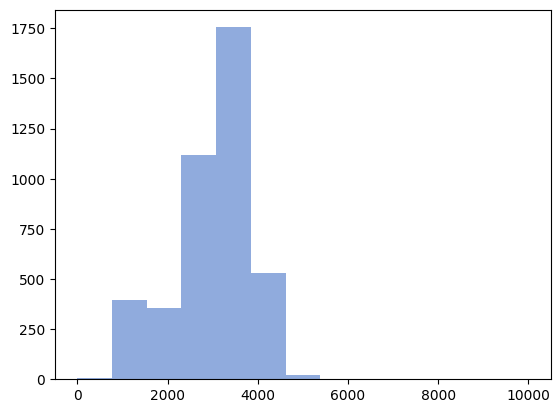

In [41]:
Current = plt.hist(welding_data['Current (A)'], bins = b[3], facecolor = (144 /255,171 /255,221 /255), range=(0, 10000))

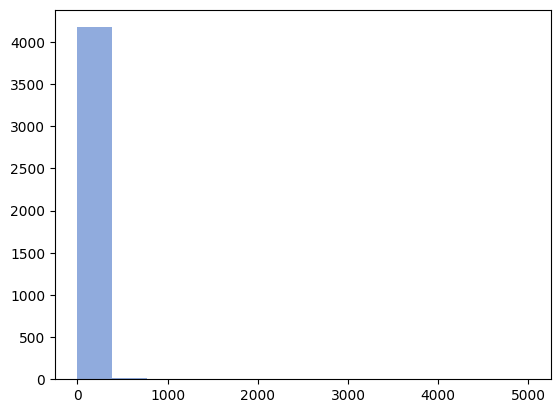

In [43]:
Thickness_A = plt.hist(welding_data['Thickness A (mm)'], bins = b[3], facecolor = (144 /255,171 /255,221 /255), range=(0, 5000))

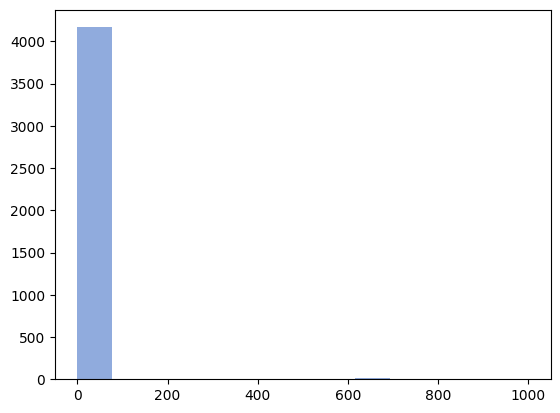

In [49]:
Thickness_B = plt.hist(welding_data['Thickness B (mm)'], bins = b[3], facecolor = (144 /255,171 /255,221 /255), range=(0, 1000))

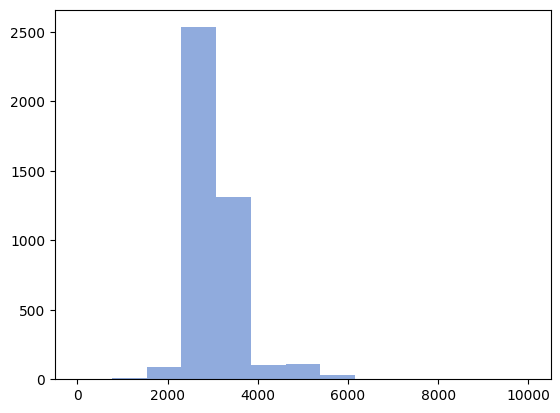

In [46]:
PullTest = plt.hist(welding_data['PullTest (N)'], bins = b[3], facecolor = (144 /255,171 /255,221 /255), range=(0, 10000))

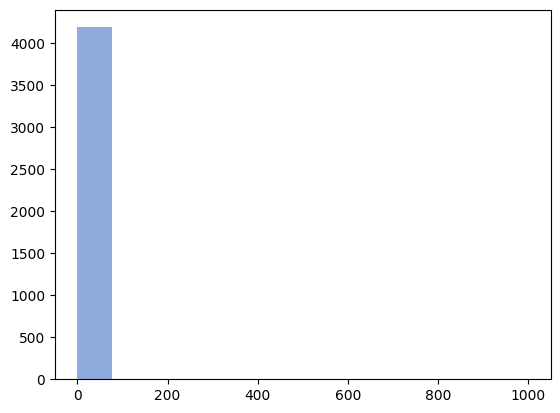

In [48]:
PulNuggetDiameterlTest = plt.hist(welding_data['NuggetDiameter (mm)'], bins = b[3], facecolor = (144 /255,171 /255,221 /255), range=(0, 1000))

In [14]:
new_welding_data = welding_data[['Pressure (PSI)','Welding Time (ms)','Force (N)','Current (A)','Thickness A (mm)','Thickness B (mm)']]
new_welding_data.head()

,Pressure (PSI),Welding Time (ms),Force (N),Current (A),Thickness A (mm),Thickness B (mm)
Sample ID,,,,,,
1,35,200,0.00,1315.41,0.922,0.920
1,35,200,3.41,1337.45,0.922,0.920
1,35,200,6.82,1081.47,0.922,0.920
2,35,1500,0.00,1819.13,0.920,0.925
2,35,1500,3.41,2016.44,0.920,0.925


In [15]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(new_welding_data)
scaled_data = scaler.transform(new_welding_data)
scaled_data

array([[0.00000000e+00, 0.00000000e+00, 4.25751516e-01, 2.76877632e-01,
        5.00489260e-04, 4.94146267e-04],
       [0.00000000e+00, 0.00000000e+00, 4.40416290e-01, 2.81192069e-01,
        5.00489260e-04, 4.94146267e-04],
       [0.00000000e+00, 0.00000000e+00, 4.55081065e-01, 2.31082740e-01,
        5.00489260e-04, 4.94146267e-04],
       ...,
       [4.16666667e-01, 7.69230769e-01, 8.45654324e-01, 7.16149580e-01,
        3.36867771e-05, 2.05894278e-05],
       [4.16666667e-01, 7.69230769e-01, 8.46213392e-01, 8.52222699e-01,
        3.36867771e-05, 2.05894278e-05],
       [4.16666667e-01, 7.69230769e-01, 8.46772459e-01, 7.85617107e-01,
        3.36867771e-05, 2.05894278e-05]])

In [69]:
scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df.to_csv('new_scaled_data.csv')

In [31]:
# AutoEncoder 클래스 구현
class AutoEncoder(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(AutoEncoder, self).__init__()
        # initialize
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        # 오토인코더 구현
        self.AutoEncoder = nn.Sequential(
            #인코더 
            nn.Linear(input_size, hidden_size[0]),
            nn.RReLU(),
            nn.Linear(hidden_size[0], output_size),
            nn.RReLU(),
            # 디코더
            nn.Linear(output_size, hidden_size[0]),
            nn.RReLU(),
            nn.Linear(hidden_size[0], input_size)
        )

    def forward(self, inputs):
        output = self.AutoEncoder(inputs)

        return output

In [32]:
train_data = torch.Tensor(scaled_data[:4185]) # 처음부터 4185번까지 데이터를 훈련세트로 지정
print(len(train_data))

4185


In [26]:
# 훈련 하이퍼파라미터
epoch = 100
batch_size = 64
lr = 0.01
# 모델 하이퍼파라미터
input_size = len(train_data[0])
hidden_size = [5]
output_size = 2
# 손실 함수로 제곱근 오차 사용
criterion = nn.MSELoss()
# 매개 변수 조정 방식으로 Adam 사용
optimizer = torch.optim.Adam
# 오토인코더 정의
AutoEncoder = AutoEncoder(input_size, hidden_size, output_size)

In [27]:
# 학습 함수에 대한 정의
def train_net(AutoEncoder, data, criterion, epochs, lr_rate = 0.01):
    # Optimizer에 대한 정의
    optim = optimizer(AutoEncoder.parameters(), lr = lr_rate)
    #배치 학습을 시키기 위한 데이터 변환
    data_iter = DataLoader(data, batch_size = batch_size, shuffle=True)
    #에포크 학습
    for epoch in range(1, epochs + 1):
        running_loss = 0.0
        for x in data_iter:
            # 매개변수 0으로 초기화
            optim.zero_grad()
            output = AutoEncoder(x)
            # 입력값과 출력값 간의 차이인 손실값
            loss = criterion(x, output)
            # 손실 값을 기준으로 매개변수 조정
            loss.backward()
            optim.step()
            running_loss += loss.item()

        # 각 에포크마다 손실 값 표기
        print("epoch: {}, loss: {:.2f}".format(epoch, running_loss))
    return AutoEncoder

In [28]:
# 학습 함수를 이용한 오토인코더 학습
AutoEncoder = train_net(AutoEncoder, train_data, criterion, epoch, lr)

epoch: 1, loss: 9.28
epoch: 2, loss: 1.33
epoch: 3, loss: 1.21
epoch: 4, loss: 1.15
epoch: 5, loss: 1.12
epoch: 6, loss: 1.10
epoch: 7, loss: 1.08
epoch: 8, loss: 1.05
epoch: 9, loss: 0.98
epoch: 10, loss: 0.93
epoch: 11, loss: 0.90
epoch: 12, loss: 0.88
epoch: 13, loss: 0.87
epoch: 14, loss: 0.83
epoch: 15, loss: 0.81
epoch: 16, loss: 0.78
epoch: 17, loss: 0.71
epoch: 18, loss: 0.56
epoch: 19, loss: 0.54
epoch: 20, loss: 0.52
epoch: 21, loss: 0.50
epoch: 22, loss: 0.49
epoch: 23, loss: 0.48
epoch: 24, loss: 0.46
epoch: 25, loss: 0.45
epoch: 26, loss: 0.44
epoch: 27, loss: 0.44
epoch: 28, loss: 0.43
epoch: 29, loss: 0.42
epoch: 30, loss: 0.41
epoch: 31, loss: 0.41
epoch: 32, loss: 0.40
epoch: 33, loss: 0.40
epoch: 34, loss: 0.39
epoch: 35, loss: 0.38
epoch: 36, loss: 0.37
epoch: 37, loss: 0.36
epoch: 38, loss: 0.36
epoch: 39, loss: 0.35
epoch: 40, loss: 0.35
epoch: 41, loss: 0.35
epoch: 42, loss: 0.35
epoch: 43, loss: 0.34
epoch: 44, loss: 0.35
epoch: 45, loss: 0.35
epoch: 46, loss: 0.

In [29]:
# 훈련세트의 손실 값 이용한 임계값 정의
train_loss_chart = []
for data in train_data:
    output = AutoEncoder(data)
    loss = criterion(output, data)
    train_loss_chart.append(loss.item())

threshold = np.mean(train_loss_chart) + np.std(train_loss_chart)*8
print("Threshold : ", threshold)

Threshold :  0.1270618216937407


In [30]:
# 훈련 세트의 손실값 이용한 임계값 정의
train_test_loss_chart = []
for data in train_data:
    output = AutoEncoder(data)
    loss = criterion(output, data)
    train_test_loss_chart.append(loss.item())

outlier = list(train_test_loss_chart >= threshold)
outlier.count(True)

32

In [93]:
data_category = welding_data['Category']
data_category.value_counts()

Category
Good       3814
Explode     284
Bad          88
Name: count, dtype: int64